In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from random import randrange
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics import tsaplots

In [86]:
temp = pd.read_csv('daily-max-temperatures.csv',sep=',',index_col=0,header=0,parse_dates=True)
temp.head()

,Temperature
Date,
1981-01-01,38.1
1981-01-02,32.4
1981-01-03,34.5
1981-01-04,20.7
1981-01-05,21.5


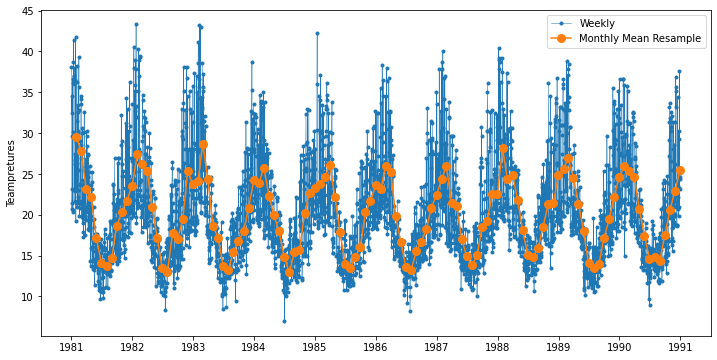

In [87]:

y=temp['Temperature']
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Teampretures')
ax.legend();


In [88]:
monthly_data=pd.DataFrame()

In [89]:
monthly_data['temp']=temp.Temperature.resample('M').mean()


<AxesSubplot: xlabel='Date'>

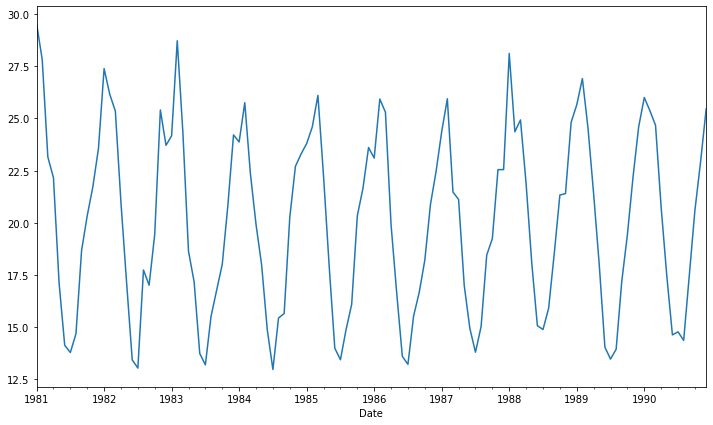

In [90]:
plt.figure(figsize=(12,7))
monthly_data['temp'].plot()

<Figure size 1440x936 with 0 Axes>

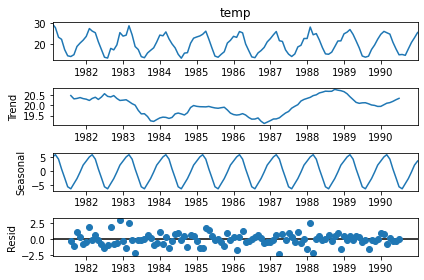

In [93]:
plt.figure(figsize=(20,13))
data_decompose=seasonal_decompose(monthly_data['temp'],model='additive')
data_decompose.plot()
plt.show()

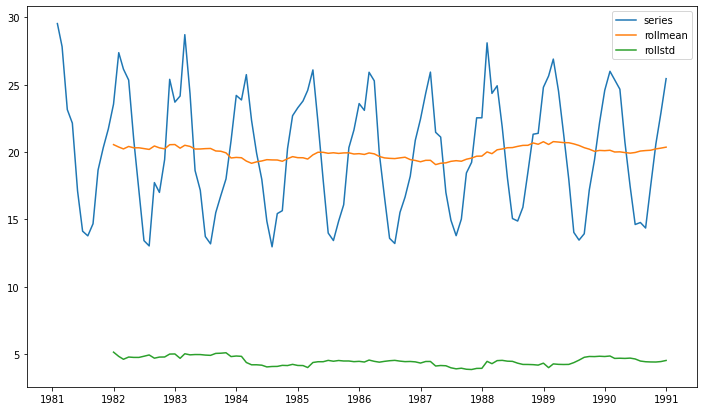

In [94]:
def stationarity_test(timeseries,title):
    rollmean=pd.Series(timeseries).rolling(window=12).mean()
    rollstd=pd.Series(timeseries).rolling(window=12).std()
    
    fig,ax=plt.subplots(figsize=(12,7))
    ax.plot(timeseries,label='series')
    ax.plot(rollmean,label='rollmean')
    ax.plot(rollstd,label='rollstd')
    ax.legend()
    
stationarity_test(monthly_data['temp'] ,'row data')

In [96]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_data, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.392118
p-value                          0.586049
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [97]:
df_stationary=monthly_data['temp'].diff().dropna()
df_stationary.head()

Date
1981-02-28   -1.716244
1981-03-31   -4.674078
1981-04-30   -1.004731
1981-05-31   -5.037204
1981-06-30   -2.989462
Freq: M, Name: temp, dtype: float64

<AxesSubplot: xlabel='Date'>

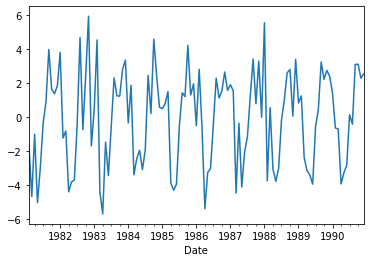

In [98]:
df_stationary.plot()

<AxesSubplot: xlabel='Date'>

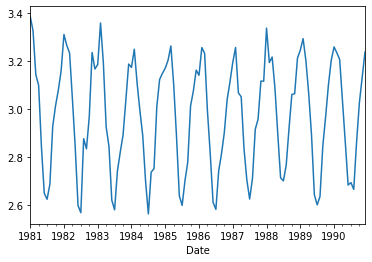

In [99]:
log_stationary=np.log(monthly_data['temp'])
log_stationary.plot()

<AxesSubplot: xlabel='Date'>

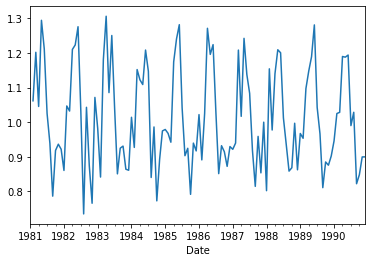

In [31]:
df_shift=monthly_data['temp'].shift(1)/monthly_data['temp']
df_shift.plot()

In [33]:
df_squrt=np.sqrt(monthly_data['temp'])

<AxesSubplot: xlabel='Date'>

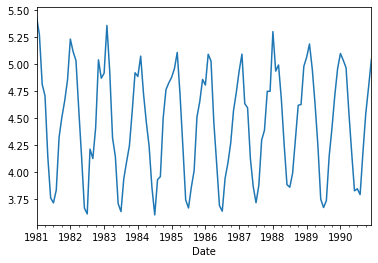

In [34]:
df_squrt.plot()

In [35]:
y = monthly_data['temp'] 


train= y[:40]
test= y[40:]

In [36]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

In [37]:
auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=241.069, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=204.869, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=207.359, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=359.243, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=195.668, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=193.621, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=172.861, Time=0.25 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=173.485, Time=0.28 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=171.036, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=179.477, Time=0.25 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=175.315, Time=0.32 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=181.373, Time=0.33 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=173.766, Time

ARIMA(order=(4, 0, 1), scoring_args={}, suppress_warnings=True)

In [38]:
auto_arima(y,test='adf', seasonal=True,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
                     

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=437.514, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=700.188, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=577.549, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=607.588, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1067.694, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=549.331, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=475.343, Time=0.20 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=478.637, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=557.837, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=530.489, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=464.353, Time=0.34 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=562.110, Time=0.08 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Total f

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [39]:
from statsmodels.tsa.arima.model import ARIMA


In [40]:
model=ARIMA(train,order=(1,1,1)).fit()

In [56]:
result1=model.summary()
result1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                   40
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -95.701
Date:                Tue, 25 Jul 2023   AIC                            197.402
Time:                        10:51:36   BIC                            202.392
Sample:                    01-31-1981   HQIC                           199.192
                         - 04-30-1984                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4460      0.466      0.957      0.338      -0.467       1.359
ma.L1         -0.1088      0.478     -0.228      0.820      -1.045       0.828
sigma2         7.8965      2.318      3.407      0.001       3.353      12.440
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.06
Prob(Q):                              0.97   Prob(JB):                         0.59
Heteroskedasticity (H):               0.93   Skew:                            -0.07
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
pred=model.predict(start=len(train), end=(len(y)-1),dynamic=True)
pred

1984-05-31    18.980758
1984-06-30    18.561830
1984-07-31    18.374976
1984-08-31    18.291634
1984-09-30    18.254461
                ...    
1990-08-31    18.224532
1990-09-30    18.224532
1990-10-31    18.224532
1990-11-30    18.224532
1990-12-31    18.224532
Freq: M, Name: predicted_mean, Length: 80, dtype: float64

In [43]:
test

Date
1984-05-31    17.967742
1984-06-30    14.870000
1984-07-31    12.964516
1984-08-31    15.432258
1984-09-30    15.650000
                ...    
1990-08-31    14.361290
1990-09-30    17.470000
1990-10-31    20.600000
1990-11-30    22.903333
1990-12-31    25.458065
Freq: M, Name: temp, Length: 80, dtype: float64

In [44]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

MAPE: 0.195339


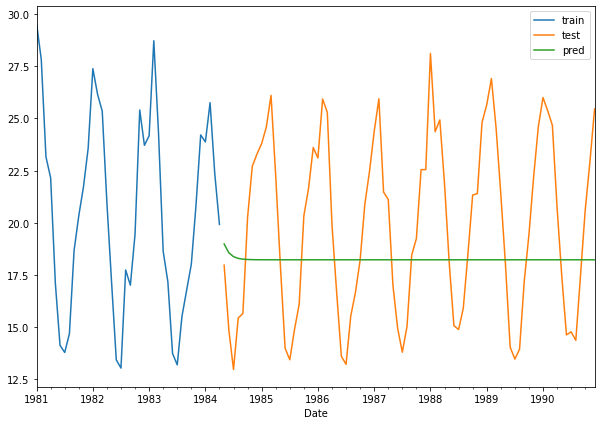

In [46]:
train.plot(label='train',figsize=(10,7))
test.plot(label='test')
pred.plot(label='pred')
plt.legend()

#### import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

In [62]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

1984-05-31    15.722118
1984-06-30    12.534591
1984-07-31    12.011937
1984-08-31    15.155082
1984-09-30    15.982580
                ...    
1990-08-31    11.055283
1990-09-30    11.978730
1990-10-31    13.679645
1990-11-30    17.398521
1990-12-31    18.829319
Freq: M, Name: predicted_mean, Length: 80, dtype: float64

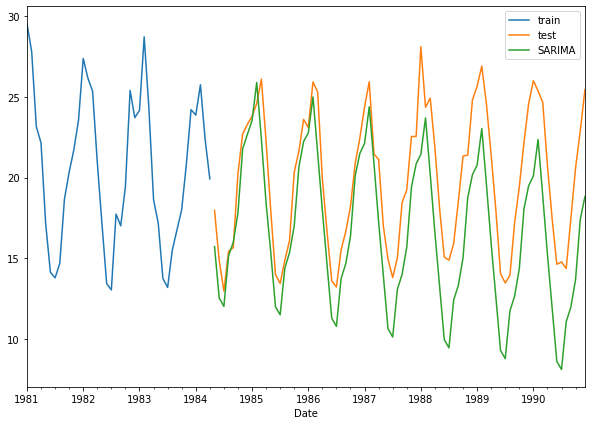

In [63]:
train.plot(label='train',figsize=(10,7))
test.plot(label='test')
pre.plot(label='SARIMA')
plt.legend()

In [64]:
mape= mean_absolute_percentage_error(test, pre)

print('MAPE1: %f' %mape)

MAPE1: 0.172986


In [66]:
future_temp= results.predict(start=len(y) , end= len(y)+12  )

In [67]:
future_temp

1991-01-31    19.426539
1991-02-28    21.692127
1991-03-31    18.203899
1991-04-30    14.564350
1991-05-31    11.250444
1991-06-30     7.935186
1991-07-31     7.426726
1991-08-31    10.383896
1991-09-30    11.307403
1991-10-31    13.008238
1991-11-30    16.726958
1991-12-31    18.158096
1992-01-31    18.755153
Freq: M, Name: predicted_mean, dtype: float64

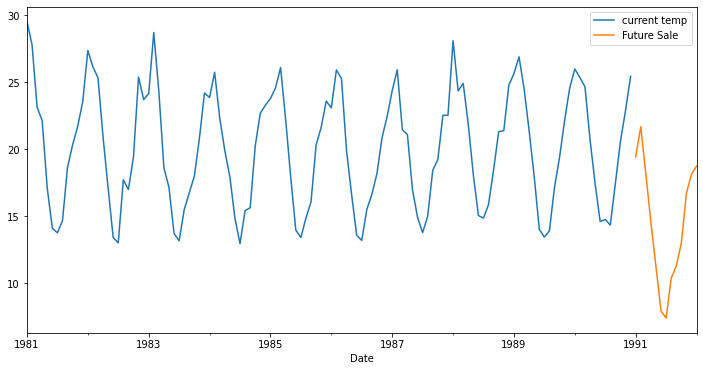

In [68]:
y.plot(label='current temp',figsize=(12,6))
future_temp.plot(label='Future Sale')
plt.legend()